In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'

In [2]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data load

## train.csv
> source_system.tab: 이벤트가 트리거된 탭의 이름<br>
> source_screen_name: 사용자가 보는 레이아웃의 이름<br>
> source_type: 사용자가 모바일 앱에서 가장 처음으로 음악을 재생하는 진입점

In [4]:
X_train=pd.read_csv("train.csv")
X_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [ ]:
X_train.shape

In [ ]:
X_train.info()

In [ ]:
#null갯수 확인
X_train["song_id"].isnull().sum()
X_train["source_system_tab"].isnull().sum()
X_train["source_screen_name"].isnull().sum()
X_train["source_type"].isnull().sum()

In [ ]:
X_train['target'].value_counts()

In [ ]:
#source_system.tab: 이벤트가 트리거된 탭의 이름
X_train["source_system_tab"].value_counts()

In [ ]:
#source_screen_name: 사용자가 보는 레이아웃의 이름
X_train["source_screen_name"].value_counts()

In [ ]:
#source_type: 사용자가 모바일 앱에서 가장 처음으로 음악을 재생하는 진입점
X_train["source_type"].value_counts()

## test.csv
> source_system.tab: 이벤트가 트리거된 탭의 이름<br>
> source_screen_name: 사용자가 보는 레이아웃의 이름<br>
> source_type: 사용자가 모바일 앱에서 가장 처음으로 음악을 재생하는 진입점

In [5]:
X_test=pd.read_csv("test.csv")
X_test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [ ]:
X_test.shape

In [ ]:
X_test.info()

In [ ]:
#null갯수 확인
X_test["song_id"].isnull().sum()
X_test["source_system_tab"].isnull().sum()
X_test["source_screen_name"].isnull().sum()
X_test["source_type"].isnull().sum()

In [ ]:
#source_system.tab: 이벤트가 트리거된 탭의 이름
X_test["source_system_tab"].value_counts()

In [ ]:
#source_screen_name: 사용자가 보는 레이아웃의 이름
X_test["source_screen_name"].value_counts()

In [ ]:
#source_type: 사용자가 모바일 앱에서 가장 처음으로 음악을 재생하는 진입점
X_test["source_type"].value_counts()

## songs.csv (노래)
> song_length : 길이<br>
> genre_ids : 장르 id

In [6]:
song=pd.read_csv("songs.csv")
song.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
song.head(1000)

In [ ]:
song.shape

In [ ]:
song.info()

In [ ]:
#song["genre_ids"].value_counts()
song["artist_name"].value_counts()

In [ ]:
#null갯수 확인
song["song_id"].isnull().sum()
song["song_length"].isnull().sum()
song["genre_ids"].isnull().sum()
song["artist_name"].isnull().sum()
song["composer"].isnull().sum()
song["lyricist"].isnull().sum()
song["language"].isnull().sum()

## members.csv (회원정보)
> bd : 나이 <br>
> registered_via : 등록방법 <br>
> registration_init_time : 등록기간 (추정)<br>
> expiration_date : 만료일

In [7]:
member=pd.read_csv("members.csv", parse_dates=['registration_init_time','expiration_date'])
member.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [ ]:
#member["bd"].value_counts()

In [ ]:
member.shape

In [ ]:
member.info()

In [ ]:
#등록방법
member["registered_via"].value_counts()

## song_extra_info.csv
> name : 곡명 <br>
> isrc : 국제 표준 녹음 코드 (노래의 id로 사용 가능하지만 공식적으로 확인되지 않음)

In [8]:
song_info = pd.read_csv("song_extra_info.csv")
song_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
song_info.shape

In [ ]:
#null갯수 확인
song_info["song_id"].isnull().sum()
song_info["name"].isnull().sum()
song_info["isrc"].isnull().sum()

In [ ]:
song_info.info()

## sample_submission.csv

In [9]:
sub = pd.read_csv("sample_submission.csv")
sub

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
2556785,2556785,0.5
2556786,2556786,0.5
2556787,2556787,0.5
2556788,2556788,0.5


In [ ]:
#X_test의 행 갯수가 같음 (해당id로 제출)
sub.shape

# EDA

## Data Merge

In [20]:
# train
df = X_train

# test
df_test = X_test

# songs.csv파일을 [song_id]로 left join
# train
df = pd.merge(df, song, on='song_id', how='left')
# test
df_test = pd.merge(df_test, song, on='song_id', how='left')

# members.csv 파일을 [msno]로 left join
# train
df=pd.merge(df, member, on='msno', how='left')
# test
df_test=pd.merge(df_test, member, on='msno', how='left')

# song_extra_info.csv 파일을 song_id로 left join
# train
df=pd.merge(df, song_info, on='song_id', how='left')
# test
df_test=pd.merge(df_test, song_info, on='song_id', how='left')

In [15]:
#df(train)에는 id가 없고, df_test에는 target 피처가 없음
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 21 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   song_id                 object        
 2   source_system_tab       object        
 3   source_screen_name      object        
 4   source_type             object        
 5   target                  int64         
 6   song_length             float64       
 7   genre_ids               object        
 8   artist_name             object        
 9   composer                object        
 10  lyricist                object        
 11  language                float64       
 12  city                    int64         
 13  bd                      int64         
 14  gender                  object        
 15  registered_via          int64         
 16  registration_init_time  datetime64[ns]
 17  expiration_date         datetime64[ns]
 18  na

## df 파일 데이터 탐색

In [ ]:
df.head()
df_test.head()

In [ ]:
df.shape, df_test.shape

## 결측값 확인

<AxesSubplot:>

<AxesSubplot:>

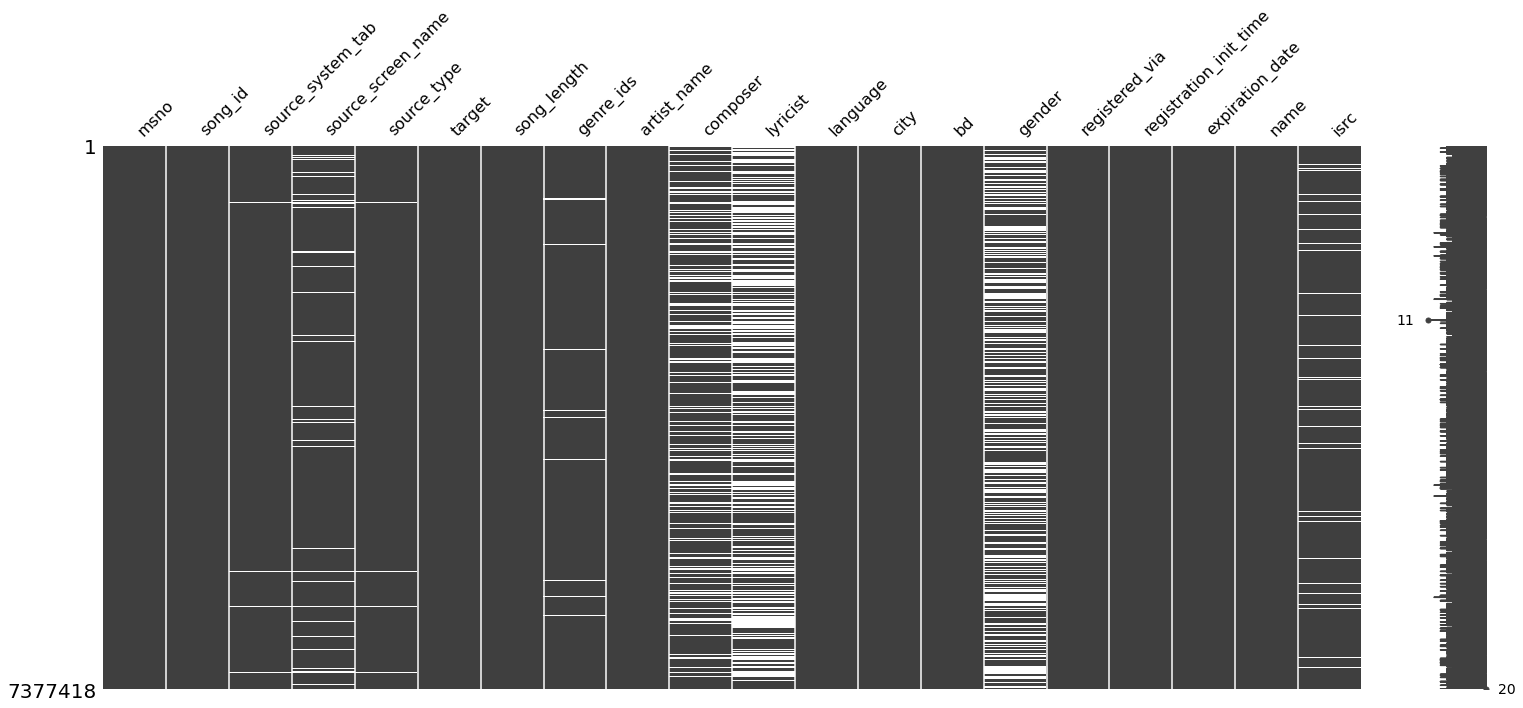

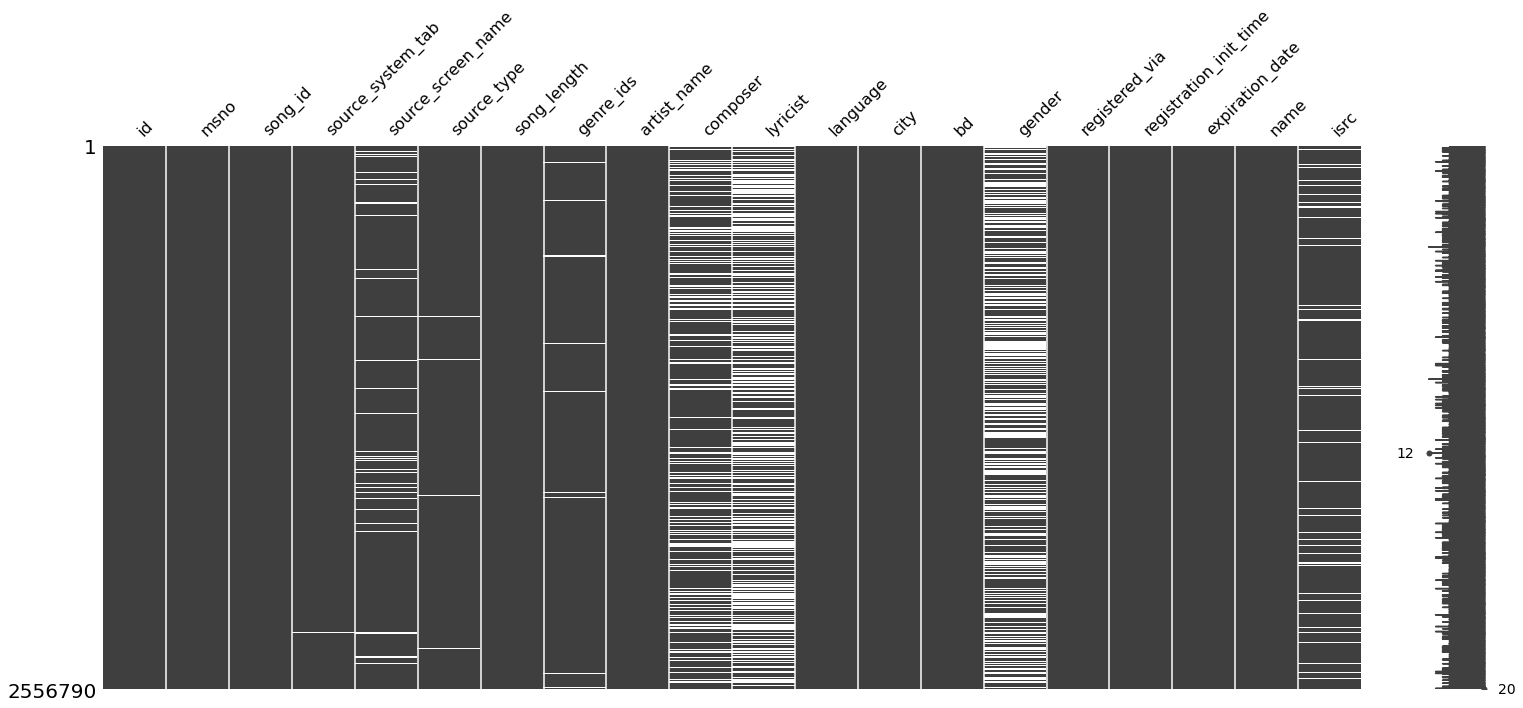

In [6]:
msno.matrix(df)
msno.matrix(df_test)

## 피처 요약표

In [7]:
# train 데이터 타입 및 결측치 확인
ch1 = pd.DataFrame(df.dtypes, columns=["Data Type"])
ch1["Unique Values"] = df.nunique().sort_values()
ch1["Null Values"] = df.isnull().sum()
ch1["% null Values"] = df.isnull().sum()/len(df)
ch1 = ch1.sort_values(by="Null Values", ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)
ch1

,Data Type,Unique Values,Null Values,% null Values
lyricist,object,33888,3178798,0.430882
gender,object,2,2961479,0.401425
composer,object,76064,1675706,0.227140
isrc,object,269760,577858,0.078328
source_screen_name,object,20,414804,0.056226
genre_ids,object,572,118455,0.016056
source_system_tab,object,8,24849,0.003368
source_type,object,12,21539,0.002920
name,object,234144,1457,0.000197
language,float64,10,150,0.000020


## Data visualization

In [9]:
df.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'city', 'bd', 'gender',
       'registered_via', 'registration_init_time', 'expiration_date', 'name',
       'isrc'],
      dtype='object')

<Figure size 504x432 with 0 Axes>

Text(0.5, 1.0, 'Target Distribution')

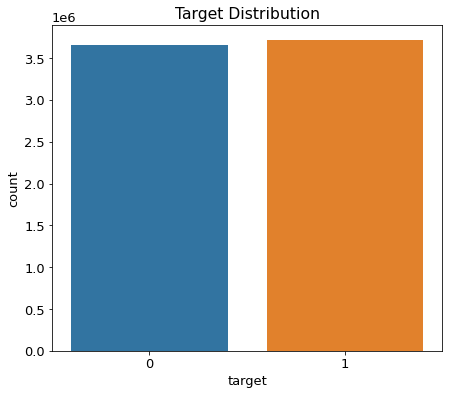

In [50]:
# 타깃값 분포 확인하기
mpl.rc('font', size=13) # 폰트 크기 설정
plt.figure(figsize=(7, 6)) # Figure 크기 설정

# 타깃값 분포 카운트플롯
ax = sns.countplot(x='target', data=df)
ax.set_title('Target Distribution')

In [51]:
# 각 값의 비율 그래프 상단에 표시하기.
# 비율을 표시해주는 코드를 함수로 구현
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()      # 도형 높이(데이터 개수)
        width = patch.get_width()        # 도형 너비
        left_coord = patch.get_x()       # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100  # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력
        ax.text(x=left_coord + width/2.0,     # x축 위치
                y=height + total_size*0.001,  # y축 위치
                s=f'{percent:1.1f}%',         # 입력 텍스트
                ha='center')                  # 가운데 정렬

In [52]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 교차분석표 생성 함수
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

In [53]:
# Step2. 포인트플롯 생성 함수
# Step1에서 구한 교차분석표를 이용. 타깃값 1의 비율을 나타내는 포인트플롯을 그리는 함수 만들기 (카운트 플롯 위에 포인트플롯을 중복으로 그림)
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx()  # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    
    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values,   # 포인트플롯 순서
                        color='black',                    # 포인트플롯 색상
                        legend=False)                     # 범례 미표시
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)  # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')

In [58]:
# Step3. 피처 분포도 및 피처별 타깃값 1 비율 포인트플롯 생성 함수
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols,
                                  size=(10, 30)):
    plt.figure(figsize=size)  # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols)  # 서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=2)  # 서브플롯 좌우/상하 여백 설정
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)  # 교차분석표 생성
        
        # ax축에 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)
        
        write_percent(ax, len(df))  # 비율 표시
        
        plot_pointplot(ax, feature, crosstab)  # 포인트플롯 그리기
        
        ax.tick_params(axis='x', labelrotation=45)
        
        ax.set_title(f'{feature} Distribution')  # 그래프 제목 설정

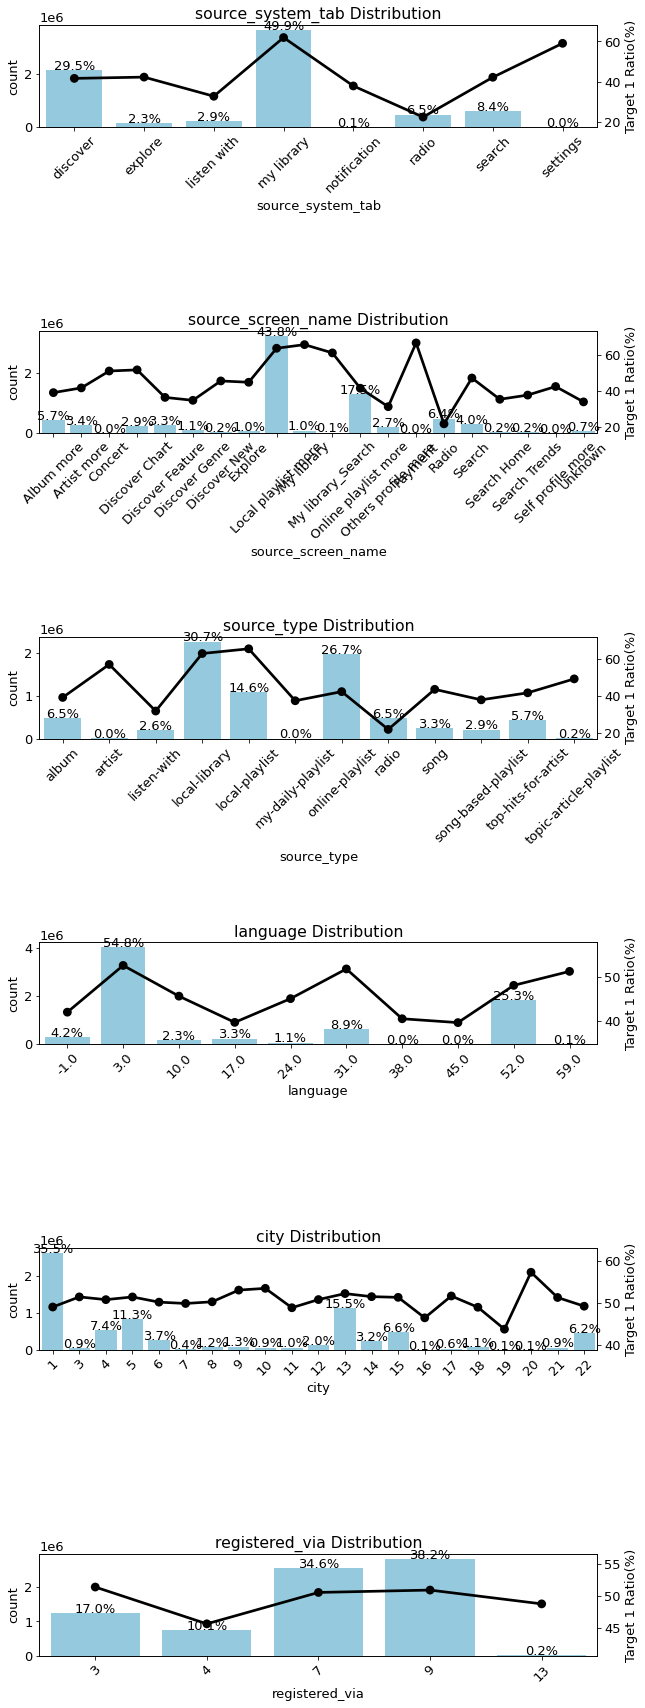

In [59]:
# 명목형 피처 분포 시각화
nom_features = ['source_system_tab', 'source_screen_name', 'source_type', 'language', 'city', 'registered_via']  # 명목형 피처
plot_cat_dist_with_true_ratio(df, nom_features, num_rows=6, num_cols=1)

- 카운트 플롯 : 피처별 고윳값 비율.
- 포인트 플롯 : 해당 고윳값 중 타깃값이 1인 비율.
- 명목형 피처 -> 원핫 인코딩

In [22]:
col_feature=[]

for col in df.columns:
    if (df[col].dtypes != 'object') & (df[col].dtypes != 'datetime64[ns]'):
        col_feature.append(col)
        
col_feature

['target', 'song_length', 'language', 'city', 'bd', 'registered_via']

Text(0.5, 1.0, 'check outlier')

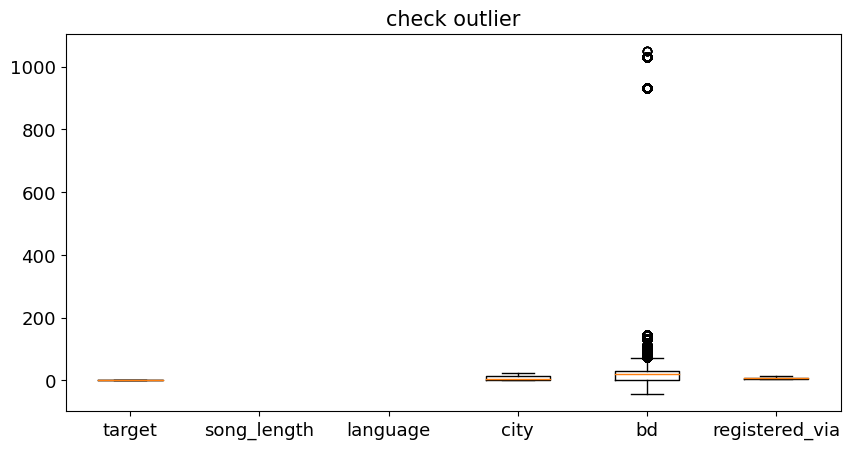

In [60]:
#박스플랏 이용해서 이상치 확인
fig=plt.figure(figsize=(10,5), dpi=100)
ax=fig.add_subplot(1,1,1)

#_=ax.boxplot(df['bd'])
_=ax.boxplot(df[col_feature], labels=col_feature)
ax.set_title('check outlier', fontsize=15)

fig.show()

# Feature Engineering

## 파생피처 추가

In [30]:
#train
# 등록 날짜 분리해서 피처 추가
df['registration_year'] = df['registration_init_time'].apply(lambda x:int(str(x)[0:4]))
df['registration_month'] = df['registration_init_time'].apply(lambda x:int(str(x)[5:7]))
df['registration_day'] = df['registration_init_time'].apply(lambda x:int(str(x)[8:10]))

# 만료 날짜 분리해서 피처 추가
df['expiration_year'] = df['expiration_date'].apply(lambda x:int(str(x)[0:4]))
df['expiration_month'] = df['expiration_date'].apply(lambda x:int(str(x)[5:7]))
df['expiration_day'] = df['expiration_date'].apply(lambda x:int(str(x)[8:10]))

df=df.drop(['registration_init_time'], axis=1)
df=df.drop(['expiration_date'], axis=1)

#test
# 등록 날짜 분리해서 피처 추가
df_test['registration_year'] = df_test['registration_init_time'].apply(lambda x:int(str(x)[0:4]))
df_test['registration_month'] = df_test['registration_init_time'].apply(lambda x:int(str(x)[5:7]))
df_test['registration_day'] = df_test['registration_init_time'].apply(lambda x:int(str(x)[8:10]))

# 만료 날짜 분리해서 피처 추가
df_test['expiration_year'] = df_test['expiration_date'].apply(lambda x:int(str(x)[0:4]))
df_test['expiration_month'] = df_test['expiration_date'].apply(lambda x:int(str(x)[5:7]))
df_test['expiration_day'] = df_test['expiration_date'].apply(lambda x:int(str(x)[8:10]))

df_test=df_test.drop(['registration_init_time'], axis=1)
df_test=df_test.drop(['expiration_date'], axis=1)

In [31]:
#isrc에서 년도 추출해 새로운 피처 생성
def isrc_to_year(isrc):
    if type(isrc)==str:
        if int(isrc[5:7])>17:
            return 1900+int(isrc[5:7])
        else:
            return 2000+int(isrc[5:7])
    else:
        return np.nan

In [32]:
df['song_year']=df['isrc'].apply(isrc_to_year)
df_test['song_year']=df['isrc'].apply(isrc_to_year)

## 결측값 처리

In [35]:
#song_length, language, song_year 피처 결측치 처리
df['song_length'].fillna(df['song_length'].mean() , inplace = True)
df['song_length'] = df['song_length'].astype(np.uint32)
df['language'].fillna(df['language'].mode().values[0] , inplace= True)
df['language'] = df['language'].astype(np.int8)
df['song_year'].fillna(1917, inplace = True)
df['song_year'] = df['song_year'].astype(np.int8)

df_test['song_length'].fillna(df_test['song_length'].mean() , inplace = True)
df_test['song_length'] = df_test['song_length'].astype(np.uint32)
df_test['language'].fillna(df_test['language'].mode().values[0] , inplace= True)
df_test['language'] = df_test['language'].astype(np.int8)
df_test['song_year'].fillna(1917, inplace = True)
df_test['song_year'] = df_test['song_year'].astype(np.int8)

In [36]:
# 결측치 채우기 - df

# String Null 일 경우, 'Unknown'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(value = "unknown")
    
# Numerics Null 일 경우, mean    
for col in df.select_dtypes(exclude=['object']).columns:
    df[col] = df[col].fillna(value = df[col].mean())

In [37]:
# 결측치 채우기 - df_test

# String Null 일 경우, 'Unknown'
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].fillna(value = "unknown")
    
# Numerics Null 일 경우, mean    
for col in df_test.select_dtypes(exclude=['object']).columns:
    df_test[col] = df_test[col].fillna(value = df_test[col].mean())

## 이상치 처리(bd)

In [38]:
#이상치 확인
df['bd'].unique()

array([   0,   24,   26,   27,   18,   34,   20,   19,   28,   41,   32,
         36,   46,   30,   23,   67,   22,   29,   21,   31,   39,   35,
         16,   25,   38,   17,   43,   47,   33,   37,   44,   49,   50,
         40,   52,   45,   53,   64,   57,   48,   51,   59,   54,   42,
         55,    3,  111,   65,   73,   60,   58,   56,   66,   14,  131,
         74,   62,   61,   63,    7,  103, 1030,  -43,   15,  105,  107,
         68,   13,  931,   72,   11,    2,   87,  144,   95,   83,   12,
         93,    5,  112,   90,   10,   70,  -38,   82,   89,  106,  102,
         85, 1051,   78,   76], dtype=int64)

In [39]:
df['bd'] = df['bd'].apply(lambda x : 0 if x > 100 else abs(x))
df_test['bd'] = df_test['bd'].apply(lambda x : 0 if x > 100 else abs(x))

In [41]:
df['bd'].unique()

array([ 0, 24, 26, 27, 18, 34, 20, 19, 28, 41, 32, 36, 46, 30, 23, 67, 22,
       29, 21, 31, 39, 35, 16, 25, 38, 17, 43, 47, 33, 37, 44, 49, 50, 40,
       52, 45, 53, 64, 57, 48, 51, 59, 54, 42, 55,  3, 65, 73, 60, 58, 56,
       66, 14, 74, 62, 61, 63,  7, 15, 68, 13, 72, 11,  2, 87, 95, 83, 12,
       93,  5, 90, 10, 70, 82, 89, 85, 78, 76], dtype=int64)

## 피처 제거

In [40]:
df=df.drop(["isrc", "name"], axis=1) #name:곡명은 song_id로 대체, isrc피처 추출 완료
df_test=df_test.drop(["isrc","name"], axis=1)

## Data Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for i in df.columns:
    df[i] = label_encoder.fit_transform(df[i])
    
for i in df_test.columns:
    df_test[i] = label_encoder.fit_transform(df_test[i])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 23 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                int16 
 1   song_id             int32 
 2   source_system_tab   int32 
 3   source_screen_name  int32 
 4   source_type         int32 
 5   target              int64 
 6   song_length         uint32
 7   genre_ids           int16 
 8   artist_name         int32 
 9   composer            int32 
 10  lyricist            int32 
 11  language            int8  
 12  city                int64 
 13  bd                  int64 
 14  gender              int32 
 15  registered_via      int64 
 16  registration_year   int64 
 17  registration_month  int64 
 18  registration_day    int64 
 19  expiration_year     int64 
 20  expiration_month    int64 
 21  expiration_day      int64 
 22  song_year           int8  
dtypes: int16(2), int32(8), int64(10), int8(2), uint32(1)
memory usage: 1.1 GB


In [74]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556790 entries, 0 to 2556789
Data columns (total 23 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  int64 
 1   msno                int16 
 2   song_id             int32 
 3   source_system_tab   int32 
 4   source_screen_name  int32 
 5   source_type         int32 
 6   song_length         uint32
 7   genre_ids           int16 
 8   artist_name         int16 
 9   composer            int32 
 10  lyricist            int16 
 11  language            int8  
 12  city                int64 
 13  bd                  int64 
 14  gender              int32 
 15  registered_via      int64 
 16  registration_year   int64 
 17  registration_month  int64 
 18  registration_day    int64 
 19  expiration_year     int64 
 20  expiration_month    int64 
 21  expiration_day      int64 
 22  song_year           int8  
dtypes: int16(4), int32(6), int64(10), int8(2), uint32(1)
memory usage: 307.2 MB


# Baseline (LGBM)

## Data split

In [30]:
#X, y 분리
y = df[['target']]
X = df.drop('target', axis=1)

In [77]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 22 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                int16 
 1   song_id             int32 
 2   source_system_tab   int32 
 3   source_screen_name  int32 
 4   source_type         int32 
 5   song_length         uint32
 6   genre_ids           int16 
 7   artist_name         int32 
 8   composer            int32 
 9   lyricist            int32 
 10  language            int8  
 11  city                int64 
 12  bd                  int64 
 13  gender              int32 
 14  registered_via      int64 
 15  registration_year   int64 
 16  registration_month  int64 
 17  registration_day    int64 
 18  expiration_year     int64 
 19  expiration_month    int64 
 20  expiration_day      int64 
 21  song_year           int8  
dtypes: int16(2), int32(8), int64(9), int8(2), uint32(1)
memory usage: 1.1 GB
<class 'pandas.core.frame.DataFrame'>
Int

In [31]:
#train_test_split
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((5901934, 22), (1475484, 22), (5901934, 1), (1475484, 1))

## LightGBM

In [32]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [33]:
import lightgbm as lgb
train_ds = lgb.Dataset(x_train, label = y_train)
val_ds = lgb.Dataset(x_valid, label = y_valid)

In [34]:
params = {
    'application' : 'binary',
    'objective' : 'binary',
    'metric' : 'auc',
    'is_unbalance' : 'true',
    'boosting' : 'gbdt',
    'num_leaves' : 216,
    'feature_fraction' : 0.9,
    'feature_fraction_seed' : 1,
    'bagging_fraction' : 0.95,
    'bagging_freq' : 1,
    'bagging_seed' : 1,
    'learning_rate' : 0.3,
    'verbose' : 0,
    'max_bin' : 510,
    'max_depth': 20,
    'num_rounds': 500,
}

lgb_model0 = lgb.train(params, train_ds, valid_sets = val_ds, verbose_eval=5)

lgb_pred0 = lgb_model0.predict(x_valid)
lgb_pred0

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.348850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[5]	valid_0's auc: 0.690221
[10]	valid_0's auc: 0.702979
[15]	valid_0's auc: 0.712748
[20]	valid_0's auc: 0.720155
[25]	valid_0's auc: 0.724743
[30]	valid_0's auc: 0.730038
[35]	valid_0's auc: 0.733012
[40]	valid_0's auc: 0.736778
[45]	valid_0's auc: 0.740253
[50]	valid_0's auc: 0.743263
[55]	valid_0's auc: 0.745729
[60]	valid_0's auc: 0.748556
[65]	valid_0's auc: 0.751786
[70]	valid_0's auc: 0.753929
[75]	valid_0's auc: 0.75

array([0.45462102, 0.17536851, 0.10281691, ..., 0.15467648, 0.35248726,
       0.26135072])

## submission - baseline

In [35]:
#df_test에서 df에 없는 컬럼인 id 제거 -> 예측 진행할 때 shape 맞추기 위해
df_test0 = df_test.drop('id', axis=1)
df_test0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556790 entries, 0 to 2556789
Data columns (total 22 columns):
 #   Column              Dtype
---  ------              -----
 0   msno                int32
 1   song_id             int32
 2   source_system_tab   int32
 3   source_screen_name  int32
 4   source_type         int32
 5   song_length         int64
 6   genre_ids           int32
 7   artist_name         int32
 8   composer            int32
 9   lyricist            int32
 10  language            int64
 11  city                int64
 12  bd                  int64
 13  gender              int32
 14  registered_via      int64
 15  registration_year   int64
 16  registration_month  int64
 17  registration_day    int64
 18  expiration_year     int64
 19  expiration_month    int64
 20  expiration_day      int64
 21  song_year           int64
dtypes: int32(10), int64(12)
memory usage: 351.1 MB


In [36]:
pred = lgb_model0.predict(df_test0)
pred

array([0.45837558, 0.22006245, 0.03386883, ..., 0.07144552, 0.18526736,
       0.21709147])

In [37]:
#value_counts() 확인
d=pd.DataFrame(pred)
d.value_counts()

0.266700    3
0.045330    3
0.159085    3
0.258381    3
0.333749    3
           ..
0.082171    1
0.082171    1
0.082171    1
0.082171    1
0.965538    1
Length: 2556232, dtype: int64

In [38]:
sub['target']=pred
sub.head()

,id,target
0,0,0.458376
1,1,0.220062
2,2,0.033869
3,3,0.017055
4,4,0.030346


In [39]:
sub.to_csv('sub.csv', index=False)

In [40]:
sub

,id,target
0,0,0.458376
1,1,0.220062
2,2,0.033869
3,3,0.017055
4,4,0.030346
...,...,...
2556785,2556785,0.053919
2556786,2556786,0.130720
2556787,2556787,0.071446
2556788,2556788,0.185267


# 성능향상 #1

## 데이터 로드 후 합치기

In [4]:
X_train=pd.read_csv("train.csv")
X_test=pd.read_csv("test.csv")
song=pd.read_csv("songs.csv")
member=pd.read_csv("members.csv", parse_dates=['registration_init_time','expiration_date'])
song_info = pd.read_csv("song_extra_info.csv")
sub = pd.read_csv("sample_submission.csv")

In [5]:
# train
df = X_train

# test
df_test = X_test

# songs.csv파일을 [song_id]로 left join
# train
df = pd.merge(df, song, on='song_id', how='left')
# test
df_test = pd.merge(df_test, song, on='song_id', how='left')

# members.csv 파일을 [msno]로 left join
# train
df=pd.merge(df, member, on='msno', how='left')
# test
df_test=pd.merge(df_test, member, on='msno', how='left')

# song_extra_info.csv 파일을 song_id로 left join
# train
df=pd.merge(df, song_info, on='song_id', how='left')
# test
df_test=pd.merge(df_test, song_info, on='song_id', how='left')


## 파생피처 추가 
=> 멤머십 등록 및 만료 날짜 컬럼을 통해, 연도/월/일 파생피처, 멤버십 기간 파생피처 생성

In [7]:
# train
# 등록 날짜 분리해서 피처 추가
df['registration_year'] = df['registration_init_time'].apply(lambda x:int(str(x)[0:4]))
df['registration_month'] = df['registration_init_time'].apply(lambda x:int(str(x)[5:7]))
df['registration_day'] = df['registration_init_time'].apply(lambda x:int(str(x)[8:10]))

# 만료 날짜 분리해서 피처 추가
df['expiration_year'] = df['expiration_date'].apply(lambda x:int(str(x)[0:4]))
df['expiration_month'] = df['expiration_date'].apply(lambda x:int(str(x)[5:7]))
df['expiration_day'] = df['expiration_date'].apply(lambda x:int(str(x)[8:10]))

# 멤버십 기간 피처 추가
df['membership_days'] = df['expiration_date'].subtract(df['registration_init_time']).dt.days.astype(int)


df=df.drop(['registration_init_time'], axis=1)
df=df.drop(['expiration_date'], axis=1)

# test
# 등록 날짜 분리해서 피처 추가
df_test['registration_year'] = df_test['registration_init_time'].apply(lambda x:int(str(x)[0:4]))
df_test['registration_month'] = df_test['registration_init_time'].apply(lambda x:int(str(x)[5:7]))
df_test['registration_day'] = df_test['registration_init_time'].apply(lambda x:int(str(x)[8:10]))

# 만료 날짜 분리해서 피처 추가
df_test['expiration_year'] = df_test['expiration_date'].apply(lambda x:int(str(x)[0:4]))
df_test['expiration_month'] = df_test['expiration_date'].apply(lambda x:int(str(x)[5:7]))
df_test['expiration_day'] = df_test['expiration_date'].apply(lambda x:int(str(x)[8:10]))

# 멤버십 기간 피처 추가
df_test['membership_days'] = df_test['expiration_date'].subtract(df_test['registration_init_time']).dt.days.astype(int)


df_test=df_test.drop(['registration_init_time'], axis=1)
df_test=df_test.drop(['expiration_date'], axis=1)

In [8]:
# isrc에서 년도 추출해 곡 등록 년도 피처 생성
def isrc_to_year(isrc):
    if type(isrc)==str:
        if int(isrc[5:7])>17:
            return 1900+int(isrc[5:7])
        else:
            return 2000+int(isrc[5:7])
    else:
        return np.nan
    
    
df['song_year']=df['isrc'].apply(isrc_to_year)
df_test['song_year']=df['isrc'].apply(isrc_to_year)

In [9]:
# 해당 곡의 장르 수 피처 생성 (genre_count)
def genre_count(genre):
    if genre == 'no_genre_ids':
        return 0
    else :
        return genre.count('|') + 1

df['genre_ids'].fillna('no_genre_ids' , inplace= True)
df['genre_ids_count'] = df['genre_ids'].apply(lambda x: genre_count(x)).astype(np.int8)
df_test['genre_ids'].fillna('no_genre_ids' , inplace= True)
df_test['genre_ids_count'] = df_test['genre_ids'].apply(lambda x: genre_count(x)).astype(np.int8)

In [10]:
# 해당 곡 피처링 여부 컬럼 생성 (is_featured)
def is_featured(art) :
    if 'feat' in str(art) :
        return 1
    return 0

df['artist_name'].fillna('no_artist', inplace = True)
df_test['artist_name'].fillna('no_artist', inplace = True)
df['is_featured'] = df['artist_name'].apply(is_featured).astype(np.int8)
df_test['is_featured'] = df_test['artist_name'].apply(is_featured).astype(np.int8)

# 해당 곡의 아티스트 수 피처 생성 (artist_count)
def artist_count(x):
    if x == 'no_artist':
        return 0
    else:
        return x.count('and') + x.count(',') + x.count('feat') + x.count('&')+ x.count('|')+ x.count('/') + x.count('//') + x.count(';')+ 1

df['artist_count'] = df['artist_name'].apply(artist_count).astype(np.int8)
df_test['artist_count'] = df_test['artist_name'].apply(artist_count).astype(np.int8)

In [11]:
# 해당 곡의 작곡가 수 피처 생성 (composer_count)
def composer_count(x):
    if x == 'no_composer':
        return 0
    else:
        return sum(map(x.count, ['|', '/', '\\', ';'])) + 1

df['composer'].fillna('no_composer',inplace=True)
df_test['composer'].fillna('no_composer',inplace=True)
df['composer_count'] = df['composer'].apply(composer_count).astype(np.int8)
df_test['composer_count'] = df_test['composer'].apply(composer_count).astype(np.int8)


# 해당 곡의 작사가 수 피처 생성 (lyricist_count)
def lyricist_count(x):
    if x == 'no_lyricist':
        return 0
    else:
        return sum(map(x.count, ['|', '/', '\\', ';'])) + 1
    return sum(map(x.count, ['|', '/', '\\', ';']))

df['lyricist'].fillna('no_lyricist',inplace=True)
df_test['lyricist'].fillna('no_lyricist',inplace=True)
df['lyricists_count'] = df['lyricist'].apply(lyricist_count).astype(np.int8)
df_test['lyricists_count'] = df_test['lyricist'].apply(lyricist_count).astype(np.int8)

In [12]:
# 해당 곡의 아티스트가 작곡가인 경우 (artist_composer)
df['artist_composer'] = (df['artist_name'] == df['composer']).astype(np.int8)
df_test['artist_composer'] = (df_test['artist_name'] == df_test['composer']).astype(np.int8)


# 해당 곡의 아티스트가 작곡가이면서 작사가인 경우 (싱어송라이터) (artist_composer_lyricist)
df['artist_composer_lyricist'] = ((df['artist_name'] == df['composer']) & (df['artist_name'] == df['lyricist']) & (df['composer'] == df['lyricist'])).astype(np.int8)
df_test['artist_composer_lyricist'] = ((df_test['artist_name'] == df_test['composer']) & (df_test['artist_name'] == df_test['lyricist']) & (df_test['composer'] == df_test['lyricist'])).astype(np.int8)

In [13]:
# song이 평균보다 긴지 안긴지
_mean_song_length = np.mean(df['song_length'])
def smaller_song(x):
    if x < _mean_song_length:
        return 1
    return 0

df['smaller_song'] = df['song_length'].apply(smaller_song).astype(np.int8)
df_test['smaller_song'] = df_test['song_length'].apply(smaller_song).astype(np.int8)

In [14]:
# 해당 곡이 데이터셋에서 얼마나 Play되었는지에 대한 피처 생성 (play_count_song)
dict_count_song_played_train = {k: v for k, v in df['song_id'].value_counts().iteritems()}
dict_count_song_played_test = {k: v for k, v in df_test['song_id'].value_counts().iteritems()}
def return_number_played(x):
    try:
        return dict_count_song_played_train[x]
    except KeyError:
        try:
            return dict_count_song_played_test[x]
        except KeyError:
            return 0
df['play_count_song'] = df['song_id'].apply(lambda x: return_number_played(x))
df_test['play_count_song'] = df_test['song_id'].apply(lambda x: return_number_played(x))

In [15]:
# 해당 유저가 데이터셋에서 얼마나 Play했는지에 대한 피처 생성 (play_count_msno)
dict_user_activity = {k:v for k,v in pd.concat([df['msno'] , df_test['msno']] , axis = 0).value_counts().iteritems()}

def return_user_activity(x):
    try:
        return dict_user_activity[x]
    except KeyError:
        return 0
    
df['play_count_msno'] = df['msno'].apply(lambda x: return_user_activity(x))
df_test['play_count_msno'] = df_test['msno'].apply(lambda x: return_user_activity(x))

In [16]:
# 해당 곡의 아티스트가 데이터셋에서 얼마나 Play되었는지에 대한 피처 생성 (play_count_artist)
_dict_count_artist_played_train = {k: v for k, v in df['artist_name'].value_counts().iteritems()}
_dict_count_artist_played_test = {k: v for k, v in df_test['artist_name'].value_counts().iteritems()}
def count_artist_played(x):
    try:
        return _dict_count_artist_played_train[x]
    except KeyError:
        try:
            return _dict_count_artist_played_test[x]
        except KeyError:
            return 0

df['play_count_artist'] = df['artist_name'].apply(count_artist_played).astype(np.int64)
df_test['play_count_artist'] = df_test['artist_name'].apply(count_artist_played).astype(np.int64)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 37 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   msno                      object 
 1   song_id                   object 
 2   source_system_tab         object 
 3   source_screen_name        object 
 4   source_type               object 
 5   target                    int64  
 6   song_length               float64
 7   genre_ids                 object 
 8   artist_name               object 
 9   composer                  object 
 10  lyricist                  object 
 11  language                  float64
 12  city                      int64  
 13  bd                        int64  
 14  gender                    object 
 15  registered_via            int64  
 16  name                      object 
 17  isrc                      object 
 18  registration_year         int64  
 19  registration_month        int64  
 20  registration_day        

## 결측치 처리

In [18]:
#song_length, language, song_year
df['song_length'].fillna(df['song_length'].mean() , inplace = True)
df['song_length'] = df['song_length'].astype(np.uint32)
df['language'].fillna(df['language'].mode().values[0] , inplace= True)
df['language'] = df['language'].astype(np.int8)
df['song_year'].fillna(1917, inplace = True)
df['song_year'] = df['song_year'].astype(np.int8)

df_test['song_length'].fillna(df_test['song_length'].mean() , inplace = True)
df_test['song_length'] = df_test['song_length'].astype(np.uint32)
df_test['language'].fillna(df_test['language'].mode().values[0] , inplace= True)
df_test['language'] = df_test['language'].astype(np.int8)
df_test['song_year'].fillna(1917, inplace = True)
df_test['song_year'] = df_test['song_year'].astype(np.int8)

In [20]:
# String Null 일 경우, 'Unknown'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(value = "unknown")
    
# Numerics Null 일 경우, mean    
for col in df.select_dtypes(exclude=['object']).columns:
    df[col] = df[col].fillna(value = df[col].mean())
    
    
# 결측치 채우기 - df_test

# String Null 일 경우, 'Unknown'
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].fillna(value = "unknown")
    
# Numerics Null 일 경우, mean    
for col in df_test.select_dtypes(exclude=['object']).columns:
    df_test[col] = df_test[col].fillna(value = df_test[col].mean())

## 이상치 처리

In [21]:
df['bd'] = df['bd'].apply(lambda x : 0 if x > 100 else abs(x))
df_test['bd'] = df_test['bd'].apply(lambda x : 0 if x > 100 else abs(x))

## 필요없는 컬럼 제거

In [22]:
drop = ['isrc', 'name']

In [23]:
df.drop(columns = drop , inplace = True)
df_test.drop(columns=drop , inplace = True)

## 데이터 인코딩

In [24]:
# 이진 피처 인코딩 ('gender' 인코딩 )
df['gender'] = df['gender'].map({'unknown':0,'female':1, 'male':2})
df_test['gender'] = df_test['gender'].map({'unknown':0,'female':1, 'male':2})

In [25]:
# 라벨 인코딩 (범주형 데이터)
from sklearn.preprocessing import LabelEncoder

label_encoding = ['source_system_tab', 'source_screen_name', 'source_type']

for f in label_encoding:
    lb = LabelEncoder()
    lb.fit(list(df[f].values) + list(df_test[f].values))
    df[f] = lb.transform(list(df[f].values))
    df_test[f] = lb.transform(list(df_test[f].values))

LabelEncoder()

LabelEncoder()

LabelEncoder()

In [26]:
# 명목형 피처 인코딩

# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes
    
# 데이터 인코딩 진행 - df_test
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].astype('category')
    
# Encoding categorical features
for col in df_test.select_dtypes(include=['category']).columns:
    df_test[col] = df_test[col].cat.codes

## 데이터 스케일링

In [27]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaling = ['song_length','membership_days',
                   'play_count_song', 'play_count_msno', 'play_count_artist']

for f in min_max_scaling :
    ms = MinMaxScaler()
    df[f] = ms.fit_transform(df[[f]])
    df_test[f] = ms.transform(df_test[[f]])

## lightgbm

In [28]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [30]:
import lightgbm as lgb

# Train, Test 바로 이용 LGBM #1
X_train = df.drop(columns = ['target'] , axis = 1)
Y_train = df['target'].values
X_test = df_test.drop(columns = ['id'] , axis = 1)
ids = df_test['id'].values
train_set = lgb.Dataset(X_train , Y_train)

# 파라미터 #1 준비 
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': 108,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': 10,
        'num_rounds': 200,
        'metric' : 'auc'
    }


# LGBM 모델 #1 훈련
%time model_f1 = lgb.train(params, train_set=train_set,  valid_sets=train_set, verbose_eval=5)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.692684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[5]	training's auc: 0.705896
[10]	training's auc: 0.711679
[15]	training's auc: 0.71669
[20]	training's auc: 0.72104
[25]	training's auc: 0.725218
[30]	training's auc: 0.729393
[35]	training's auc: 0.731912
[40]	training's auc: 0.734084
[45]	training's auc: 0.737171
[50]	training's auc: 0.739127
[55]	training's auc: 0.741391
[60]	training's auc: 0.743406
[65]	training's auc: 0.745281
[70]	training's auc: 0.747414
[75]	training's auc: 0.748829
[80]	training's auc: 0.75054
[85]	training's auc: 0.75191
[90]	training's auc: 0.752864
[95]	training's auc: 0.754202
[100]	training's auc: 0.755306
[105]	training's auc: 0.756207
[110]	training's auc: 0.757935
[115]	training's auc: 0.758645
[120]	training's auc: 0.759395
[125]	training's auc: 0.760704
[130]	training's auc: 0.762131
[135]	training's auc: 0.763502
[140]	training's auc: 

## submission_lgb_1

In [31]:
pred_test = model_f1.predict(X_test)
sub = pd.DataFrame()
sub['id'] = ids
sub['target'] = pred_test
sub.to_csv('sub_lgbm_1.csv' , index = False , float_format ='%.5f')

# 성능향상 #2

## lgb_2
- baseline에서 사용한 파라미터가 아닌 다른 하이퍼 파라미터를 적용시켜서

In [32]:
# 파라미터 #2 준비
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'dart',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': 108,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': 10,
        'num_rounds': 200,
        'metric' : 'auc'
    }

%time model_f2 = lgb.train(params, train_set=train_set,  valid_sets=train_set, verbose_eval=5)

pred_test = model_f2.predict(X_test)
sub = pd.DataFrame()
sub['id'] = ids
sub['target'] = pred_test
sub.to_csv('sub_lgbm_2.csv' , index = False , float_format ='%.5f')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.700230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[5]	training's auc: 0.705896
[10]	training's auc: 0.710683
[15]	training's auc: 0.71463
[20]	training's auc: 0.719812
[25]	training's auc: 0.721669
[30]	training's auc: 0.725239
[35]	training's auc: 0.727358
[40]	training's auc: 0.729758
[45]	training's auc: 0.730901
[50]	training's auc: 0.730866
[55]	training's auc: 0.73266
[60]	training's auc: 0.733336
[65]	training's auc: 0.733533
[70]	training's auc: 0.733787
[75]	training's auc: 0.735111
[80]	training's auc: 0.735807
[85]	training's auc: 0.735421
[90]	training's auc: 0.735603
[95]	training's auc: 0.736006
[100]	training's auc: 0.736527
[105]	training's auc: 0.736605
[110]	training's auc: 0.736216
[115]	training's auc: 0.737255
[120]	training's auc: 0.737981
[125]	training's auc: 0.738083
[130]	training's auc: 0.739058
[135]	training's auc: 0.739782
[140]	training's auc

## xgboost

In [33]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=0, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [35]:
xgb_pred = xgb_model.predict_proba(X_test)[:, 1]
xgb_pred = pd.DataFrame(xgb_pred) 
sub['target'] = xgb_pred
sub.to_csv('sub_xgboost.csv', index=False, float_format = '%.5f')

12/10 바꾼 부분 : 파생피처 부분을 EDA -> feature engineering 부분 첫번째 과정으로 바꿈<br>
-> 명목형 시각화 부분 바뀜<br>
-> 결측값 확인 / 피처 요약표 생성 부분 결과 바뀜

## lgb_1, lgb_2, xgb 앙상블

In [37]:
lgb_test_1 = model_f1.predict(X_test)

In [40]:
lgb_test_1=pd.DataFrame(lgb_test_1)
lgb_test_1

,0
0,0.607792
1,0.658013
2,0.136709
3,0.112923
4,0.115664
...,...
2556785,0.341139
2556786,0.489711
2556787,0.300980
2556788,0.396830


In [41]:
# XGB & LGBM 앙상블
xgb_lgb_asb = np.mean([lgb_test_1, xgb_pred], axis = 0)

sub = pd.DataFrame()
sub['id'] = ids
sub['target'] = xgb_lgb_asb
sub.to_csv('submission_xgb_lgbm_asb.csv', index=False, float_format = '%.5f')